In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [46]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 데이터 불러오기


In [47]:
data = pd.read_csv('sampled_data/rawdata_pj1.csv')

# 데이터 전처리
- 소비를 그려서 고소비층과 저소비층으로 나누자.
- 각 그룹의 소비 패턴을 파악해야 한다.
- 소비 패턴 파악의 결과로 고소비층을 위한 프리미엄 카드와 저소비층을 위한 카드를 만들자.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123850 entries, 0 to 2123849
Data columns (total 16 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   거래년월            object
 1   고객ID            int64 
 2   가맹점업종명          object
 3   가맹점_광역시도        object
 4   가맹점_시군구         object
 5   승인건수            object
 6   승인금액            int64 
 7   연령대             object
 8   성별              object
 9   자택_시도           object
 10  자택_시군구          object
 11  승인건수_수치화        int64 
 12  년도              int64 
 13  가맹점업종명_범주화_중분류  object
 14  거래년월_분기         int64 
 15  거래년월_월          int64 
dtypes: int64(6), object(10)
memory usage: 259.3+ MB


In [49]:
# 시계열 분석을 위해 Datetime 형식으로 변환
data['거래년월'] = pd.to_datetime(data['거래년월'])

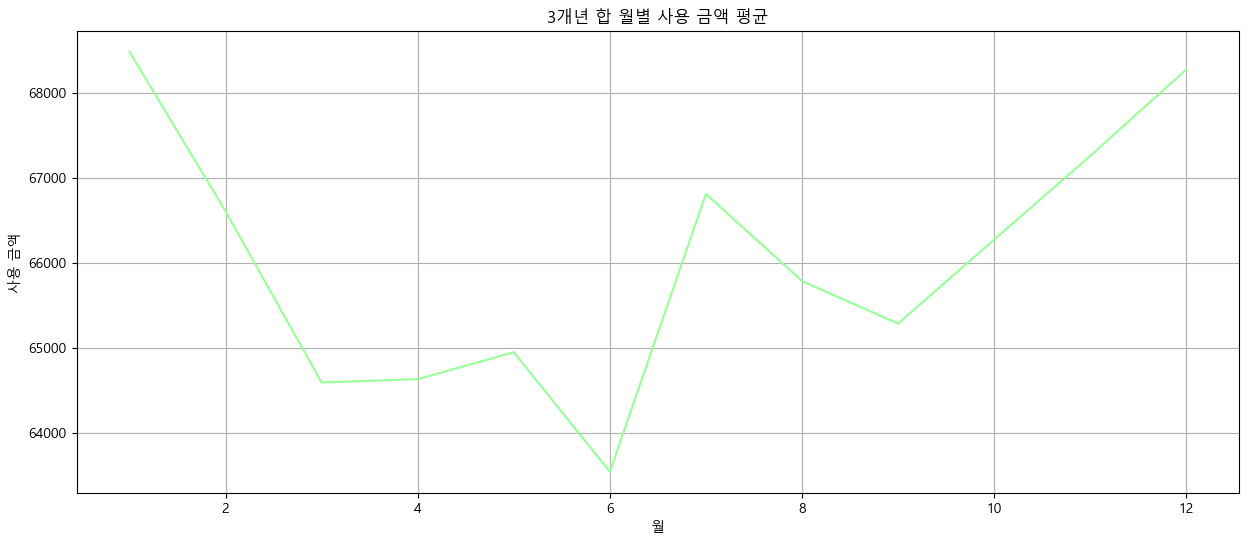

In [50]:
# 월별 순서 정의
# month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# 월별 사용금액 집계 및 순서 정렬
money_use_month = data.groupby('거래년월_월')['승인금액'].mean()#.reindex(month_order)

# 그래프 그리기
plt.figure(figsize=(15, 6))
money_use_month.plot(color='#98FF98')
plt.title('3개년 합 월별 사용 금액 평균')
plt.xlabel('월')
plt.ylabel('사용 금액')
#plt.xticks(range(len(month_order)), month_order, rotation=0)
plt.grid(True)
plt.show()


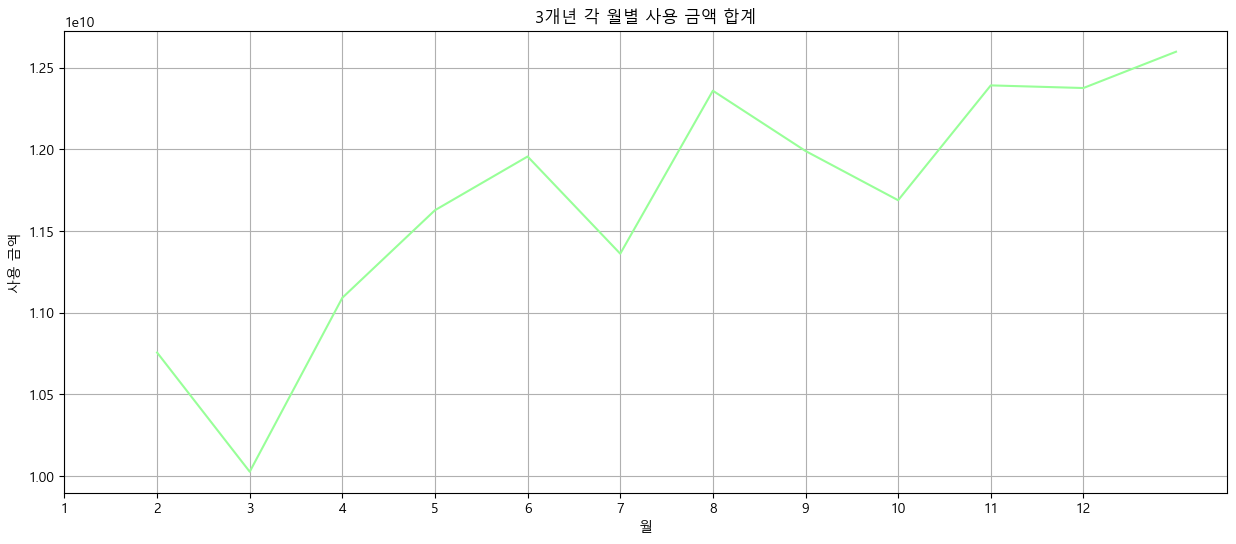

In [51]:
# 월별 순서 정의
#month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# 월별 사용금액 집계 및 순서 정렬
money_use_month_sum = data.groupby('거래년월_월')['승인금액'].sum()#.reindex(month_order)

# 그래프 그리기
plt.figure(figsize=(15, 6))
money_use_month_sum.plot(color='#98FF98')
plt.title('3개년 각 월별 사용 금액 합계')
plt.xlabel('월')
plt.ylabel('사용 금액')
plt.xticks(range(len(money_use_month_sum)), money_use_month_sum.index, rotation=0)
plt.grid(True)
plt.show()


In [52]:
# 거래월 추출 - 실행 시 자동으로 년-월로 묶이게 된다.
data_vis = data.copy()
data_vis['거래년월_년월'] = data_vis['거래년월'].dt.to_period('M')

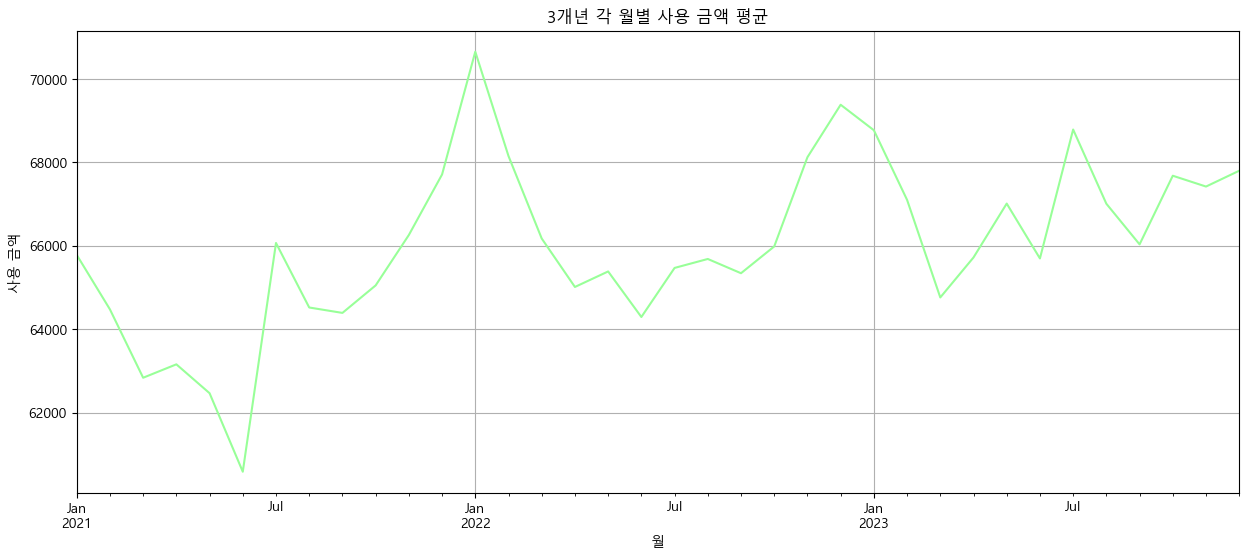

In [53]:
# 월별 사용금액 집계 및 순서 정렬
money_use_month = data_vis.groupby('거래년월_년월')['승인금액'].mean()

# 그래프 그리기
plt.figure(figsize=(15, 6))
money_use_month.plot(color='#98FF98')
plt.title('3개년 각 월별 사용 금액 평균')
plt.xlabel('월')
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()

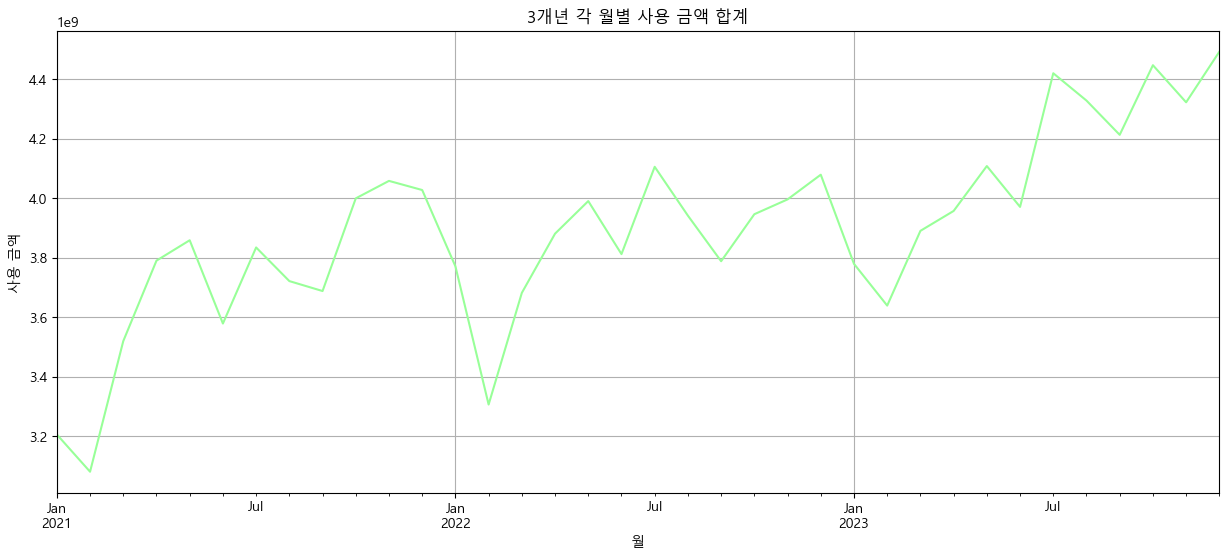

In [54]:
# 월별 사용금액 집계 및 순서 정렬
money_use_month = data_vis.groupby('거래년월_년월')['승인금액'].sum()

# 그래프 그리기
plt.figure(figsize=(15, 6))
money_use_month.plot(color='#98FF98')
plt.title('3개년 각 월별 사용 금액 합계')
plt.xlabel('월')
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()

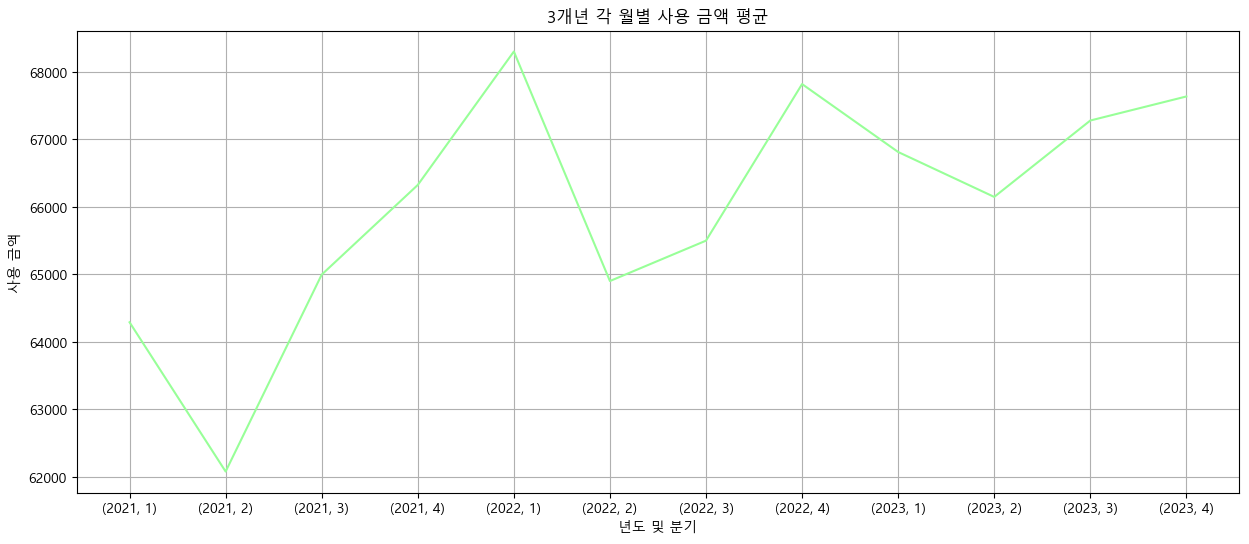

In [55]:
# 월별 사용금액 집계 및 순서 정렬
money_use_month = data_vis.groupby(['년도','거래년월_분기'])['승인금액'].mean()

# 그래프 그리기
plt.figure(figsize=(15, 6))
money_use_month.plot(color='#98FF98')
plt.title('3개년 각 월별 사용 금액 평균')
plt.xlabel('년도 및 분기')
plt.ylabel('사용 금액')
plt.xticks(range(len(money_use_month)), money_use_month.index, rotation=0)
plt.grid(True)
plt.show()

# 그룹 나누기
- 일단 boxplot을 그려서 시각화하기
- 이후 반기별 (또는 분기별)승인 금액이 75% 이상인 사람들을 고소비층으로 나누고, 나머지를 저소비층으로 나누자.


In [56]:
# 반기 계산 (1-6월은 상반기, 7-12월은 하반기)
data['반기'] = data['거래년월'].dt.month.map(lambda x: '상반기' if x <= 6 else '하반기')

# 년도와 반기를 결합하여 새로운 컬럼 생성
data['년도_반기'] = data['거래년월'].dt.year.astype(str) + '_' + data['반기']

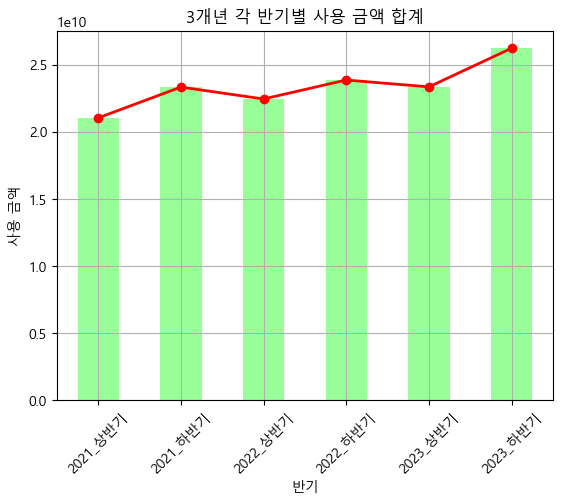

In [57]:
# 3개년 반기별 사용 금액 합계

dat_half_sum = data.groupby('년도_반기')['승인금액'].sum()

# 바 그래프 그리기
ax = dat_half_sum.plot(kind='bar', color='#98FF98')

# 꺾은선 그래프 추가
dat_half_sum.plot(color='red', marker='o', linewidth=2, ax=ax)

plt.title('3개년 각 반기별 사용 금액 합계')
plt.xlabel('반기')
plt.xticks(rotation=45)
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()


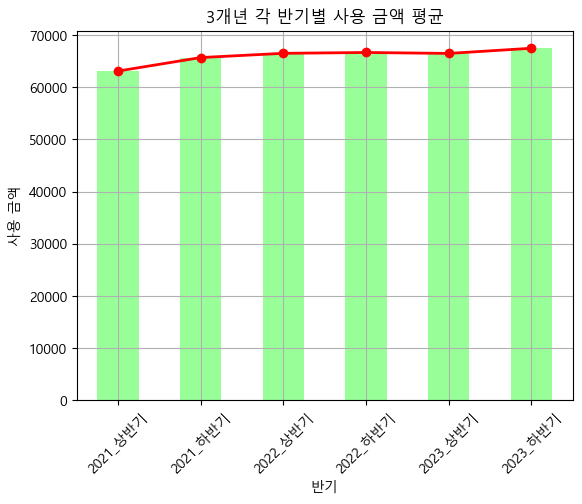

In [58]:
# 3개년 반기별 사용 금액 평균
dat_half_mean = data.groupby('년도_반기')['승인금액'].mean()

# 바 그래프 그리기 
ax = dat_half_mean.plot(kind='bar', color='#98FF98')

# 꺾은선 그래프 추가
dat_half_mean.plot(color='red', marker='o', linewidth=2, ax=ax)

plt.title('3개년 각 반기별 사용 금액 평균')
plt.xlabel('반기')
plt.xticks(rotation=45)
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()

# 프리미엄고객 찾기
- 분기당 승인금액의 합이 상위 10%인 인원들을 프리미엄 고객으로 분류?

C:\Users\campus3S031\AppData\Local\Temp\ipykernel_7508\437160833.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='거래년월_분기', y='승인금액', data=data_premium_group_q, palette='YlGn')


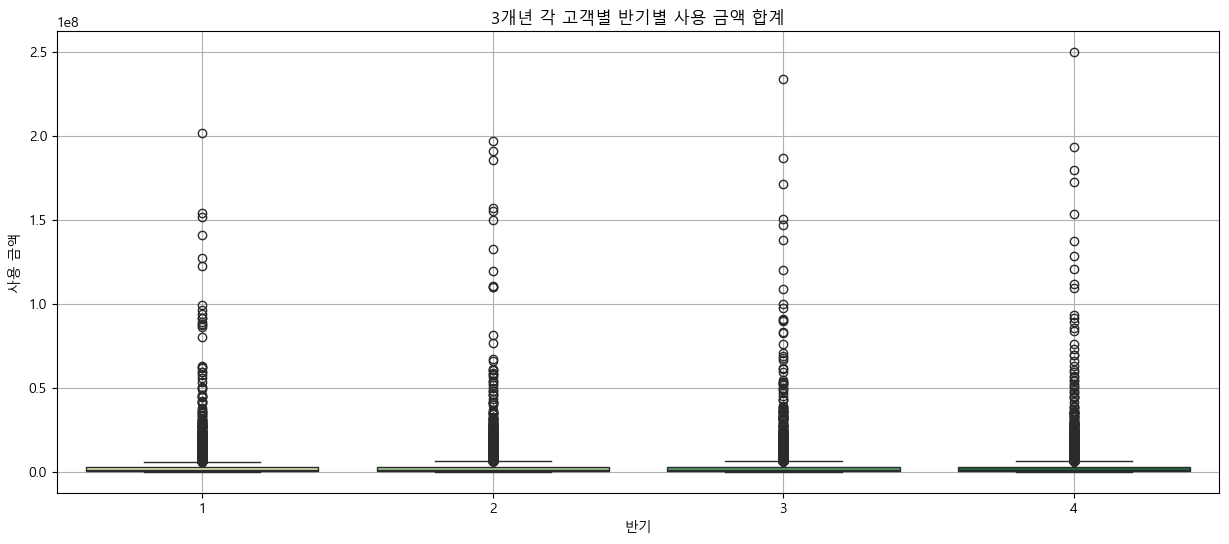

In [59]:
# 각 고객별로 년도_반기별로 사용한 금액 합계를 구하여 시각화하기 - BOXPLOT
# 이 때 고객들은 2,3,40대 인원들만 뽑음 - 5,60대 제외

data_premium_group_q = data[data['연령대'].isin(['20대', '30대', '40대'])].groupby(['고객ID', '거래년월_분기'])['승인금액'].sum().reset_index().sort_values(by = '거래년월_분기')
data_premium_group_q = pd.DataFrame(data_premium_group_q)

# Boxplot 그리기

plt.figure(figsize=(15, 6))
sns.boxplot(x='거래년월_분기', y='승인금액', data=data_premium_group_q, palette='YlGn')
plt.title('3개년 각 고객별 반기별 사용 금액 합계')
plt.xlabel('반기')
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()


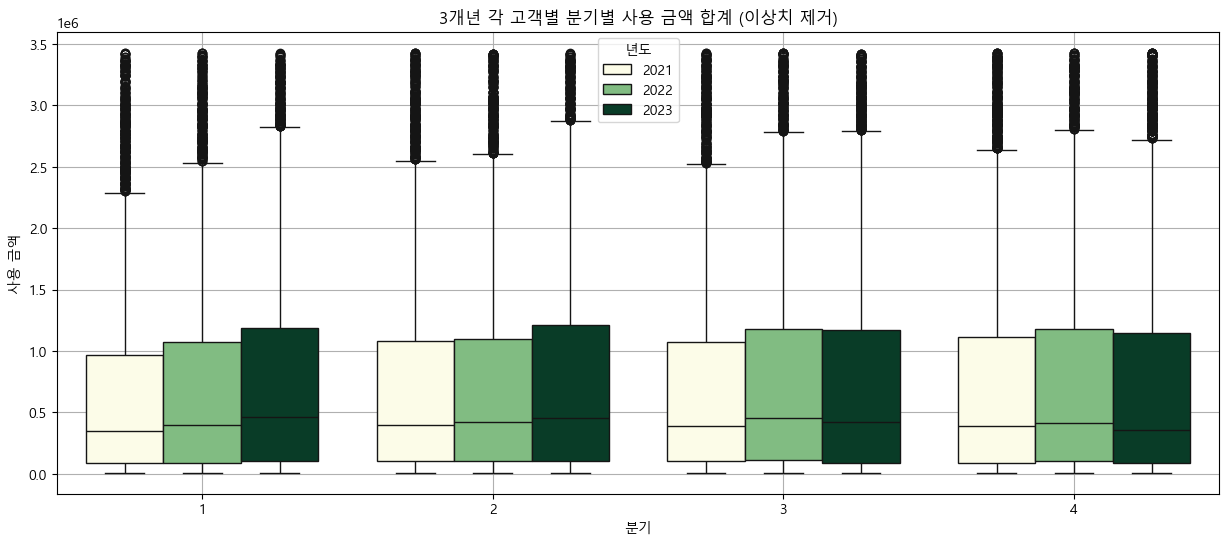

In [60]:
# 위 코드의 이상치 제거 버전

# 데이터 그룹화 및 이상치 제거를 위한 준비
data_premium_group_q = data[data['연령대'].isin(['20대', '30대', '40대'])].groupby(['고객ID', '년도', '거래년월_분기'])['승인금액'].sum().reset_index().sort_values(by=['년도', '거래년월_분기'])
data_premium_group_q = pd.DataFrame(data_premium_group_q)

# 이상치 제거
Q1 = data_premium_group_q['승인금액'].quantile(0.25)
Q3 = data_premium_group_q['승인금액'].quantile(0.75)
IQR = Q3 - Q1
data_premium_group_q_clean = data_premium_group_q[
    (data_premium_group_q['승인금액'] >= (Q1 - 1.5 * IQR)) & 
    (data_premium_group_q['승인금액'] <= (Q3 + 1.5 * IQR))
]

# Boxplot 그리기 - 이상치 제거 후
plt.figure(figsize=(15, 6))
sns.boxplot(x='거래년월_분기', y='승인금액', hue='년도', data=data_premium_group_q_clean, palette='YlGn')
plt.title('3개년 각 고객별 분기별 사용 금액 합계 (이상치 제거)')
plt.xlabel('분기')
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()


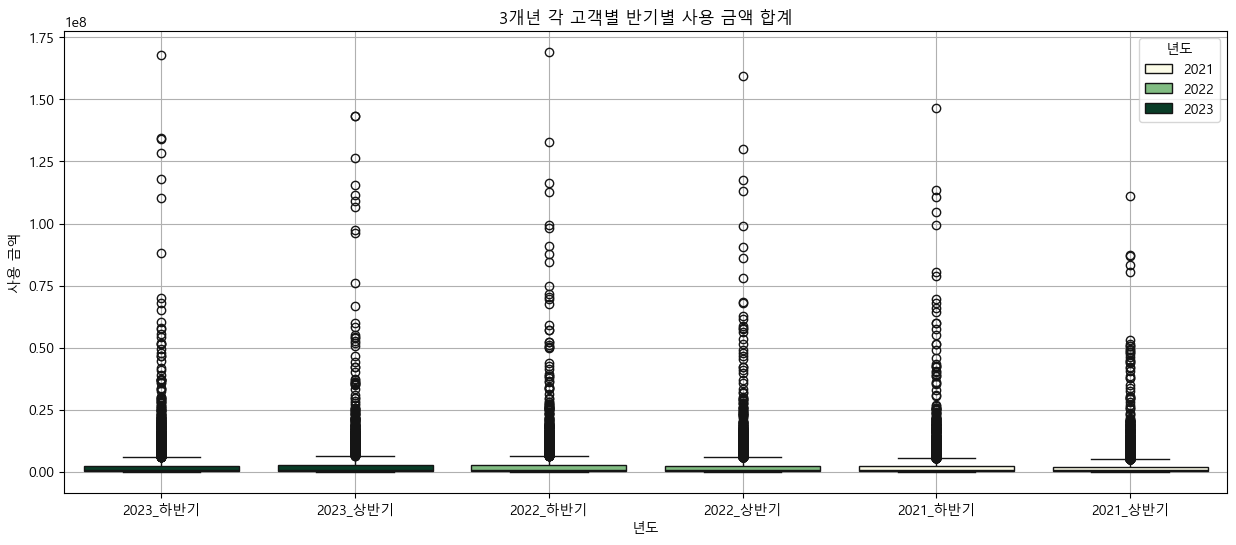

In [61]:
# 각 고객별로 년도별로 사용한 금액 합계를 구하여 시각화하기 - BOXPLOT
# 반기만 해도 이상치가 엄청 많으니 연도로 보자

data_premium_group_y = data[data['연령대'].isin(['20대', '30대', '40대'])].groupby(['고객ID','년도' ,'년도_반기'])['승인금액'].sum().reset_index()
data_premium_group_y = pd.DataFrame(data_premium_group_y)

# Boxplot 그리기

plt.figure(figsize=(15, 6))
sns.boxplot(x='년도_반기', y='승인금액',hue='년도', data=data_premium_group_y, palette='YlGn')
plt.title('3개년 각 고객별 반기별 사용 금액 합계')
plt.xlabel('년도')
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()

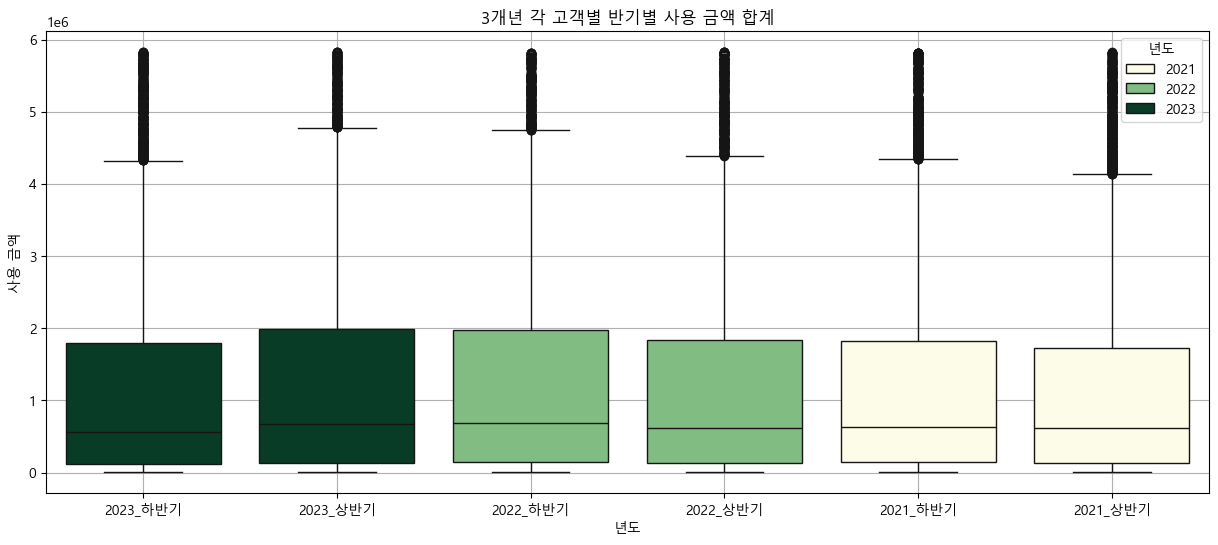

In [62]:
# 위 자료의 이상치 제거버전전

data_premium_group_y = data[data['연령대'].isin(['20대', '30대', '40대'])].groupby(['고객ID','년도' ,'년도_반기'])['승인금액'].sum().reset_index()
data_premium_group_y = pd.DataFrame(data_premium_group_y)

# 이상치 제거
Q1 = data_premium_group_y['승인금액'].quantile(0.25)
Q3 = data_premium_group_y['승인금액'].quantile(0.75)
IQR = Q3 - Q1
data_premium_group_y_clean = data_premium_group_y[
    (data_premium_group_y['승인금액'] >= (Q1 - 1.5 * IQR)) & 
    (data_premium_group_y['승인금액'] <= (Q3 + 1.5 * IQR))
]


# Boxplot 그리기

plt.figure(figsize=(15, 6))
sns.boxplot(x='년도_반기', y='승인금액', hue='년도' ,data=data_premium_group_y_clean, palette='YlGn')
plt.title('3개년 각 고객별 반기별 사용 금액 합계')
plt.xlabel('년도')
plt.ylabel('사용 금액')
plt.grid(True)
plt.show()

<Axes: ylabel='승인금액'>

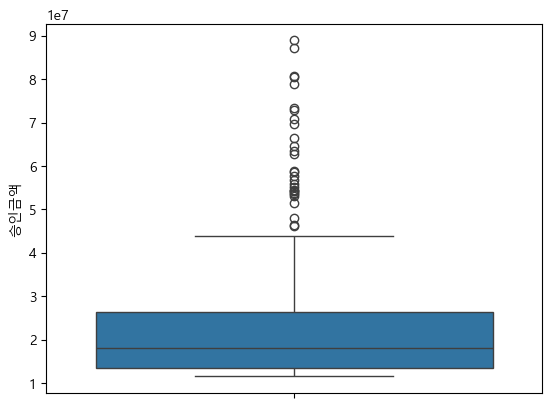

In [63]:
# 승인금액 상위 1% 데이터 추출
data_premium_group_q = data_premium_group_q[data_premium_group_q['년도'] == 2023]
threshold = data_premium_group_q['승인금액'].quantile(1-0.01)
data_premium_group_q_top1 = data_premium_group_q[data_premium_group_q['승인금액'] >= threshold]
#data_premium_group_q_top1.sort_values(by='승인금액')

sns.boxplot(data = data_premium_group_q_top1['승인금액'])

In [64]:
# 이상치가 많다 -> 꽤나 극단적임
# 프리미엄 고객을 q0.75 전부로 잡을 것인지?

# 이상치 기준을 IQR 방식으로 계산 = 일단 2022하반기를 기준으로
q1 = data_premium_group_q[(data_premium_group_q['년도'] == 2023) & (data_premium_group_q['거래년월_분기'] == 1)]['승인금액'].quantile(0.25)
q3 = data_premium_group_q[(data_premium_group_q['년도'] == 2023) & (data_premium_group_q['거래년월_분기'] == 1)]['승인금액'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# 이상치만 추출 
outliers = data_premium_group_q[
    ((data_premium_group_q['년도'] == 2023) & (data_premium_group_q['거래년월_분기'] == 1)) & 
    (data_premium_group_q['승인금액'] > upper_bound)
].sort_values(by='승인금액', ascending=False)

outliers.reset_index().head(5)

,index,고객ID,년도,거래년월_분기,승인금액
0,19516,3627746035,2023,1,78820000
1,18925,3618032627,2023,1,58630000
2,17710,3601636325,2023,1,57790000
3,19316,3624041892,2023,1,55050000
4,19114,3621144354,2023,1,54240000


In [65]:
data[data['고객ID'] == 3627746035]

,거래년월,고객ID,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,연령대,성별,자택_시도,자택_시군구,승인건수_수치화,년도,가맹점업종명_범주화_중분류,거래년월_분기,거래년월_월,반기,년도_반기
646,2021-12-01,3627746035,일반한식,경기도,성남시 분당구,5번이하,20000,40대,남,서울특별시,서초구,1,2021,식생활,4,12,하반기,2021_하반기
1345,2021-12-01,3627746035,건강진단,서울특별시,성동구,5번이하,1900000,40대,남,서울특별시,서초구,1,2021,의료,4,12,하반기,2021_하반기
1773,2021-12-01,3627746035,SK주유소,경기도,광주시,5번이하,50000,40대,남,서울특별시,서초구,1,2021,교통_및_물류,4,12,하반기,2021_하반기
3777,2021-12-01,3627746035,비영리/비대상,서울특별시,강남구,5번이하,7900000,40대,남,서울특별시,서초구,1,2021,서비스,4,12,하반기,2021_하반기
4287,2021-12-01,3627746035,일반한식,경기도,수원시 장안구,5번이하,10000,40대,남,서울특별시,서초구,1,2021,식생활,4,12,하반기,2021_하반기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120562,2023-01-01,3627746035,일반한식,서울특별시,서초구,5번이하,110000,40대,남,서울특별시,서초구,1,2023,식생활,1,1,상반기,2023_상반기
2121815,2023-01-01,3627746035,스포츠·레져용품,서울특별시,용산구,5번이하,110000,40대,남,서울특별시,서초구,1,2023,여가,1,1,상반기,2023_상반기
2122321,2023-01-01,3627746035,서양음식,서울특별시,서초구,5번이하,100000,40대,남,서울특별시,서초구,1,2023,식생활,1,1,상반기,2023_상반기
2122654,2023-01-01,3627746035,일반한식,경기도,안양시 동안구,5번이하,130000,40대,남,서울특별시,서초구,1,2023,식생활,1,1,상반기,2023_상반기


### 인사이트

- 10% ? 5%? 
- 2023년 기준으로 프리미엄만 일단 분석

## 간단 시각화 결과

- 이상치가 '지나치게' 많다!
    - 이상치 떄문에 원본의 boxplot을 관측하기 어려울 정도

- 반기당 q3가 겨우 90000원밖에 안된다??
    - 애초에 대구 고객이 대부분인데 그 사람들이 서울가서 쓴 데이터가 대부분 -> 많지 않음

- 이상치 관측 결과
    - 이상치들을 몇개 본 결과 '가구', '인터넷종합 Mall', '의원, 종합병원' 류가 대부분임
    - 이런 소비 패턴은 몇 년에 한번 정도일텐데 프리미엄 고객을 나누는데 도움이 될까?

- 대안
    - 이상치 삭제?
    - 또는 한번 결제 시 2,000,000원이 넘어가는 항목 삭제
    - 아님 원래 계획대로 일단 75%이상만 프리미엄 고객으로 분류해보되, 상위 25% 가 아닌 상위 10%를 조회 <- 일단 이것부터

In [75]:
data_premium_group_y

,고객ID,년도,년도_반기,승인금액
0,2004066711,2023,2023_하반기,40000
1,2004432929,2023,2023_하반기,460000
2,2004762122,2023,2023_하반기,360000
3,2006152542,2023,2023_하반기,60000
4,2006688466,2023,2023_하반기,110000
...,...,...,...,...
46857,9996832184,2021,2021_하반기,2850000
46858,9996832184,2022,2022_상반기,3180000
46859,9996832184,2022,2022_하반기,2160000
46860,9996882656,2021,2021_상반기,90000


## 대안 실행

In [76]:
# 반기별 승인금액 합계 기준 상위 25%만 추출
# data_premium_group_q

# 각 분기별 90% 분위수 계산
quarterly = data_premium_group_y.groupby('년도')['승인금액'].transform(lambda x: x.quantile(0.99))

# 75% 분위수 이상인 고객ID 추출
premium_customers = data_premium_group_y[data_premium_group_y['승인금액'] >= quarterly]['고객ID'].unique()

# 프리미엄 고객의 데이터만 필터링
data_premium_tmp = data[data['고객ID'].isin(premium_customers)]
data_normal_tmp = data[~data['고객ID'].isin(premium_customers)]

# 행 갯수 조회
print(data_premium_tmp.shape, data_normal_tmp.shape)

(135455, 18) (1988395, 18)


In [72]:
tmp = pd.DataFrame(data_premium_tmp.groupby(['고객ID', '거래년월_분기'])['승인금액'].sum())
tmp2 = pd.DataFrame(data_normal_tmp.groupby(['고객ID', '거래년월_분기'])['승인금액'].sum())

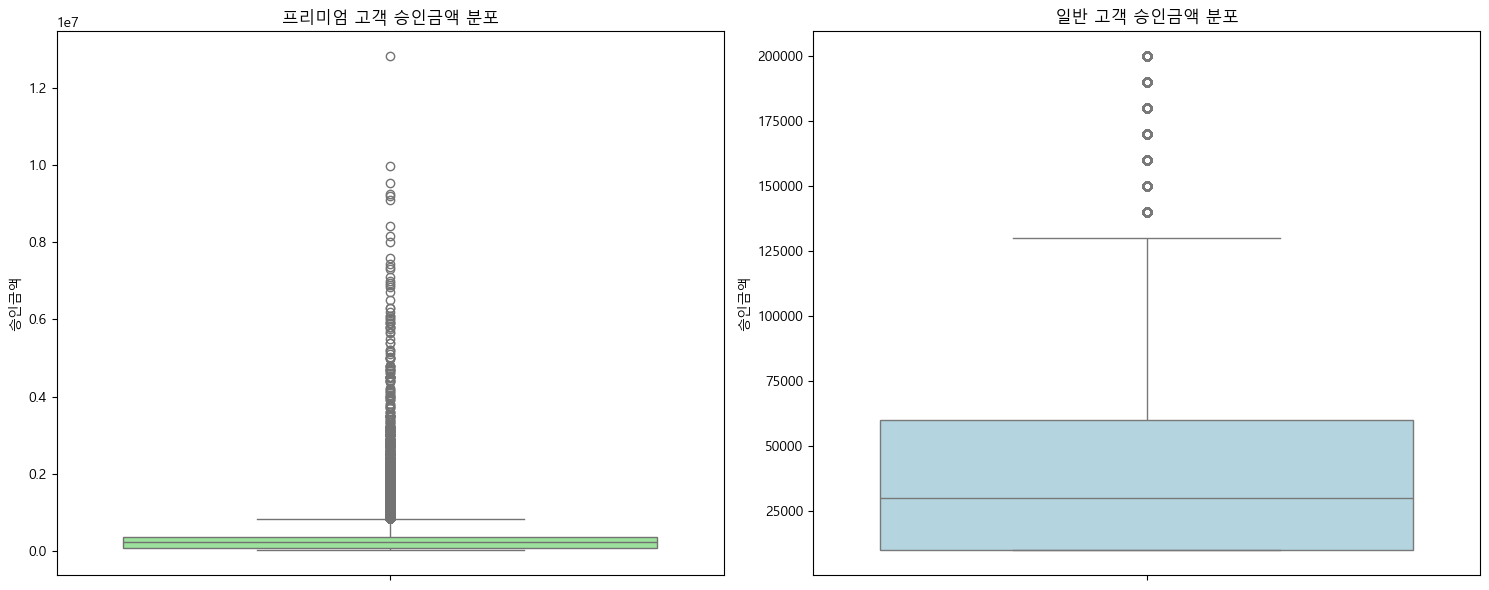

In [48]:
# 두 그룹의 boxplot을 나란히 그리기
plt.figure(figsize=(15, 6))

# 첫 번째 subplot - 프리미엄 고객
plt.subplot(1, 2, 1)
sns.boxplot(data=tmp, y='승인금액', color='lightgreen')
plt.title('프리미엄 고객 승인금액 분포')

# 두 번째 subplot - 일반 고객 
plt.subplot(1, 2, 2)
sns.boxplot(data=tmp2, y='승인금액', color='lightblue')
plt.title('일반 고객 승인금액 분포')

plt.tight_layout()
plt.show()


In [46]:
tmp.head(10)

,,승인금액
고객ID,년도_반기,
2185242638,2023_하반기,290000
2210288632,2023_하반기,250000
2225330873,2023_하반기,230000
2242059943,2023_하반기,210000
2242093950,2023_하반기,1130000
2255652414,2023_하반기,500000
2258754469,2023_하반기,690000
2280599295,2023_하반기,980000
2282895389,2023_하반기,230000


## 아이디어
- 그룹이 나뉘면 평균 사용 금액의 차이를 t-test로 확인해보자.
- 그룹의 count를 구해 anova도 해볼 수 있겠다.

## PPT 시각화 간단

In [37]:
# 의미없는 인덱스 DROP
#data = data.iloc[:,2:]

# 데이터는 2,3,40대만 
data_real = data.copy()
data = data[data['연령대'].isin(['20대', '30대', '40대'])]

In [38]:
data_male = data[data['성별'] == '남']
data_female = data[data['성별'] == '여']

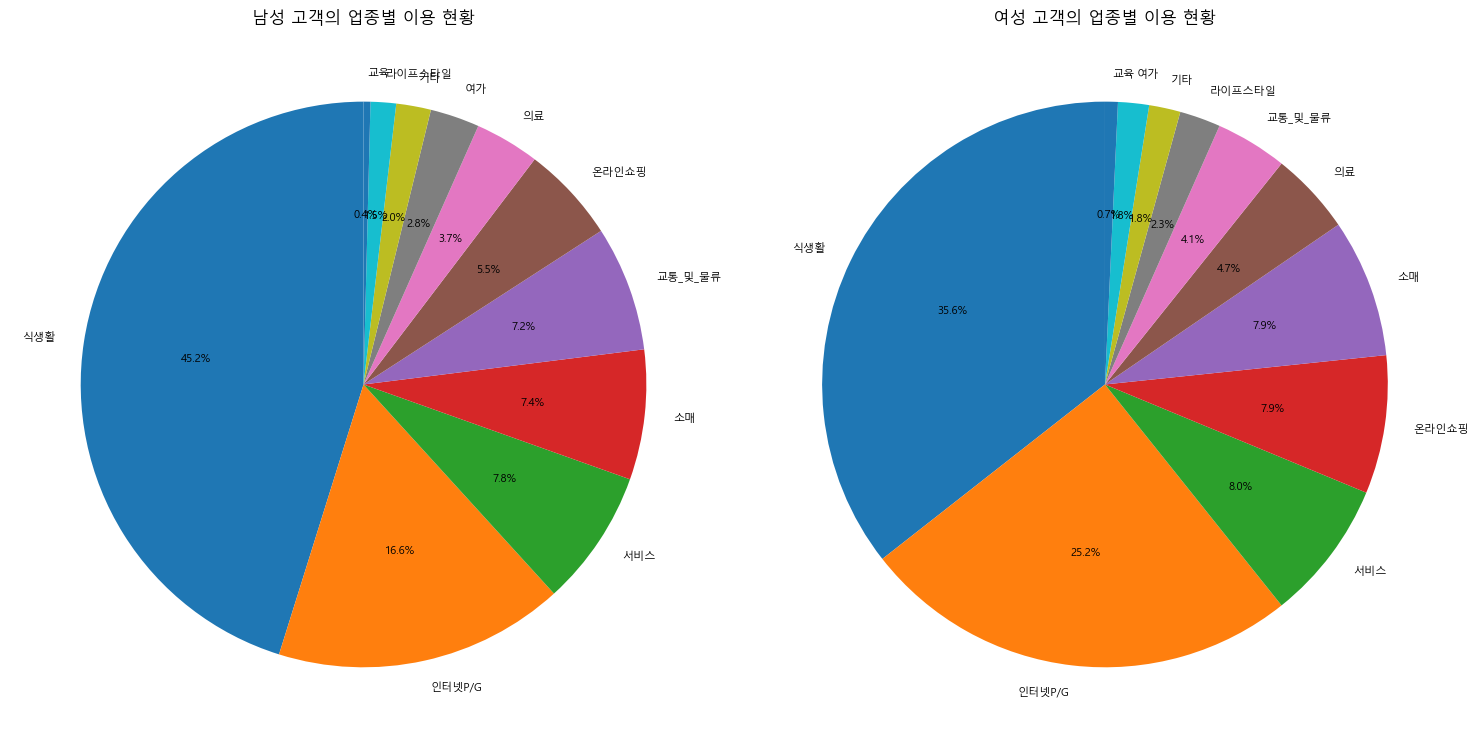

In [39]:
# 남성, 여성 고객의 업종별 이용 현황 파이차트
plt.figure(figsize=(15, 10))

plt.subplot(1,2,1)
plt.pie(data_male['가맹점업종명_범주화_중분류'].value_counts(), 
        labels=data_male['가맹점업종명_범주화_중분류'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})  # 글씨 크기 줄임
plt.title('남성 고객의 업종별 이용 현황')

plt.subplot(1,2,2)
plt.pie(data_female['가맹점업종명_범주화_중분류'].value_counts(), 
        labels=data_female['가맹점업종명_범주화_중분류'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})  # 글씨 크기 줄임
plt.title('여성 고객의 업종별 이용 현황')

plt.tight_layout()
plt.show()

In [29]:
dat_tmp = pd.read_csv('sampled_data/card_base_2021.csv')
dat_tmp2 = pd.read_csv('sampled_data/card_base_2022.csv')
dat_tmp3 = pd.read_csv('sampled_data/card_base_2023.csv')

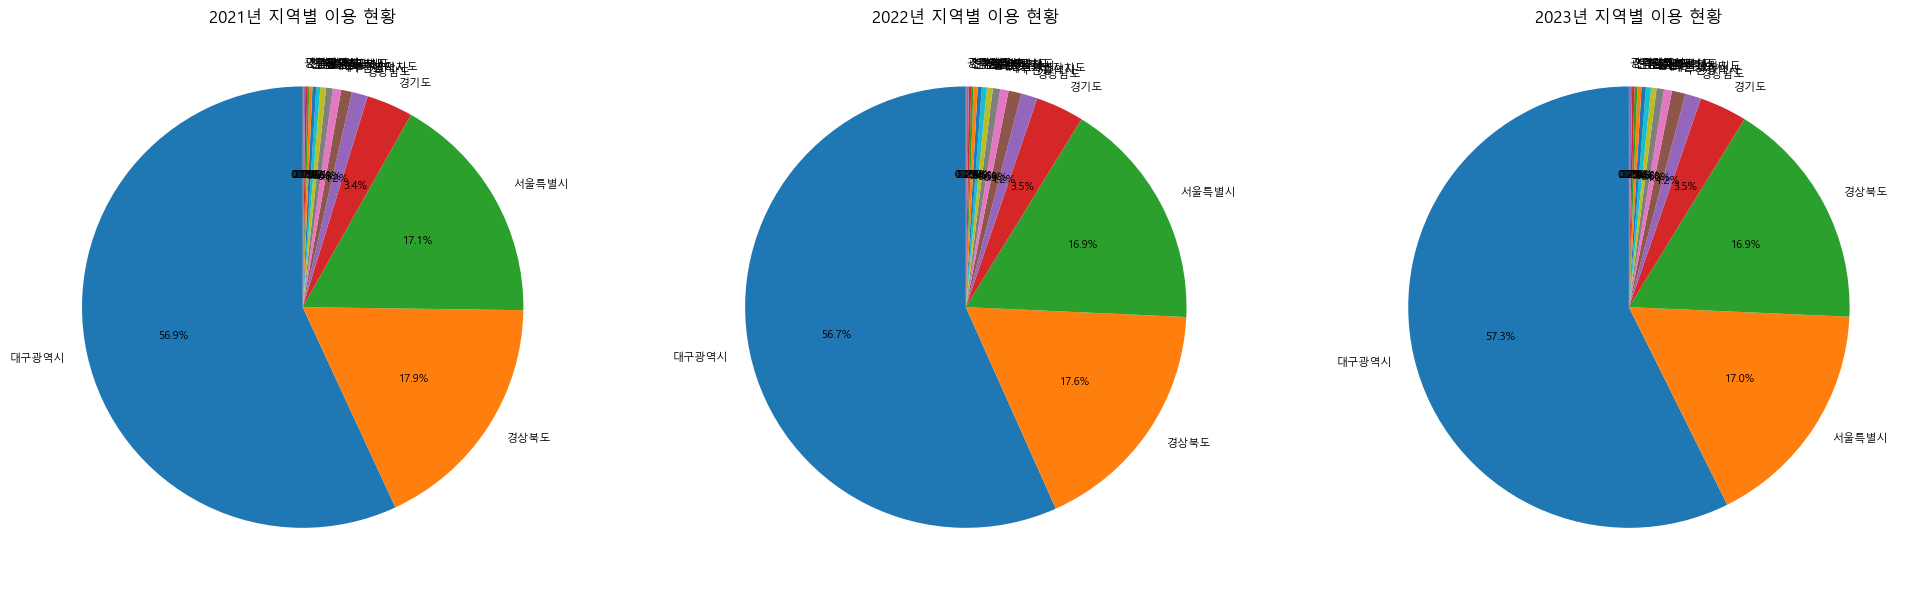

In [30]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt.pie(dat_tmp['가맹점_광역시도'].value_counts(), 
        labels=dat_tmp['가맹점_광역시도'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})
plt.title('2021년 지역별 이용 현황')

plt.subplot(1,3,2) 
plt.pie(dat_tmp2['가맹점_광역시도'].value_counts(),
        labels=dat_tmp2['가맹점_광역시도'].value_counts().index,
        autopct='%1.1f%%', 
        startangle=90,
        textprops={'fontsize': 8})
plt.title('2022년 지역별 이용 현황')

plt.subplot(1,3,3)
plt.pie(dat_tmp3['가맹점_광역시도'].value_counts(),
        labels=dat_tmp3['가맹점_광역시도'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})
plt.title('2023년 지역별 이용 현황')

plt.tight_layout()
plt.show()

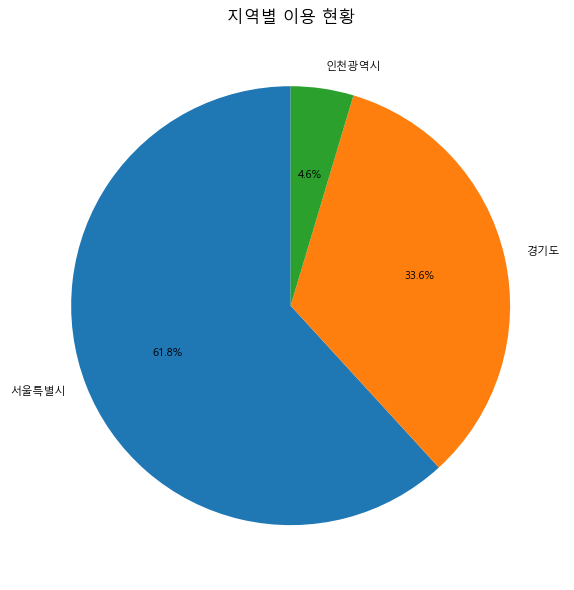

In [35]:
plt.figure(figsize=(15, 6))
plt.pie(data['가맹점_광역시도'].value_counts(),
        labels=data['가맹점_광역시도'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})
plt.title('지역별 이용 현황')
plt.tight_layout()
plt.show()

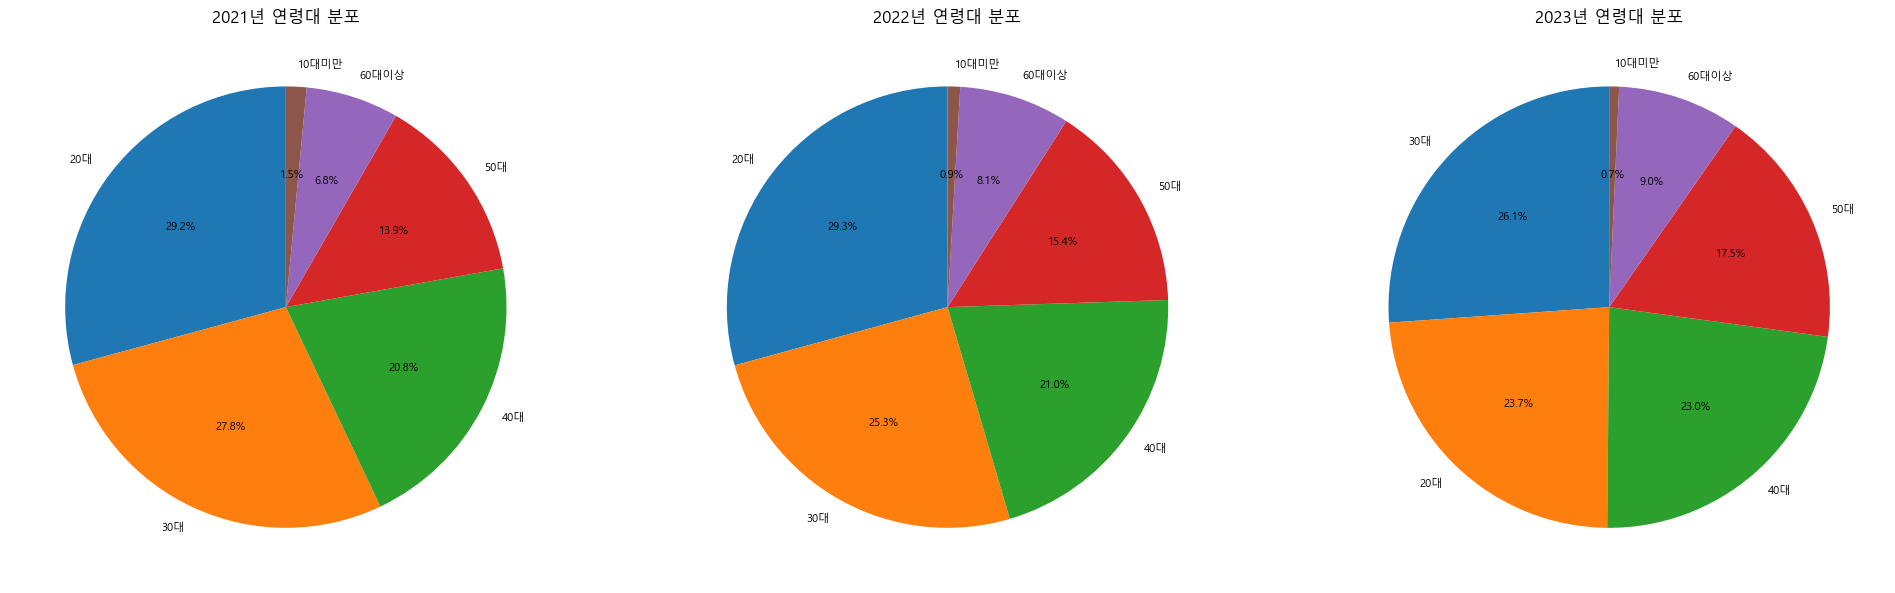

In [44]:
plt.figure(figsize=(20, 6))

plt.subplot(1,3,1)
plt.pie(data_real[data_real['년도']==2021]['연령대'].value_counts(),
        labels=data_real[data_real['년도']==2021]['연령대'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})
plt.title('2021년 연령대 분포')

plt.subplot(1,3,2)
plt.pie(data_real[data_real['년도']==2022]['연령대'].value_counts(),
        labels=data_real[data_real['년도']==2022]['연령대'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})
plt.title('2022년 연령대 분포')

plt.subplot(1,3,3)
plt.pie(data_real[data_real['년도']==2023]['연령대'].value_counts(),
        labels=data_real[data_real['년도']==2023]['연령대'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 8})
plt.title('2023년 연령대 분포')

plt.tight_layout()
plt.show()